In [3]:
import pandas as pd

In [11]:
data = pd.read_csv("y_dataSet.csv")

In [5]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

print('얍💢')

얍💢


In [12]:
y = data['score']
del data['score']
del data['Unnamed: 0']

print(data.columns)

Index(['CertificateNums', 'VolunteerHours', 'Donation', 'YearsOfService',
       'FineNums', 'ShoppingNums', 'ShoppingAmount', 'Stock',
       'RealEstateSearch', 'ElectricCar', 'BMI', 'Sex', 'Age', 'TravelNums',
       'SNSFriends', 'BookNums', 'UseTrafficNums'],
      dtype='object')


<AxesSubplot:>

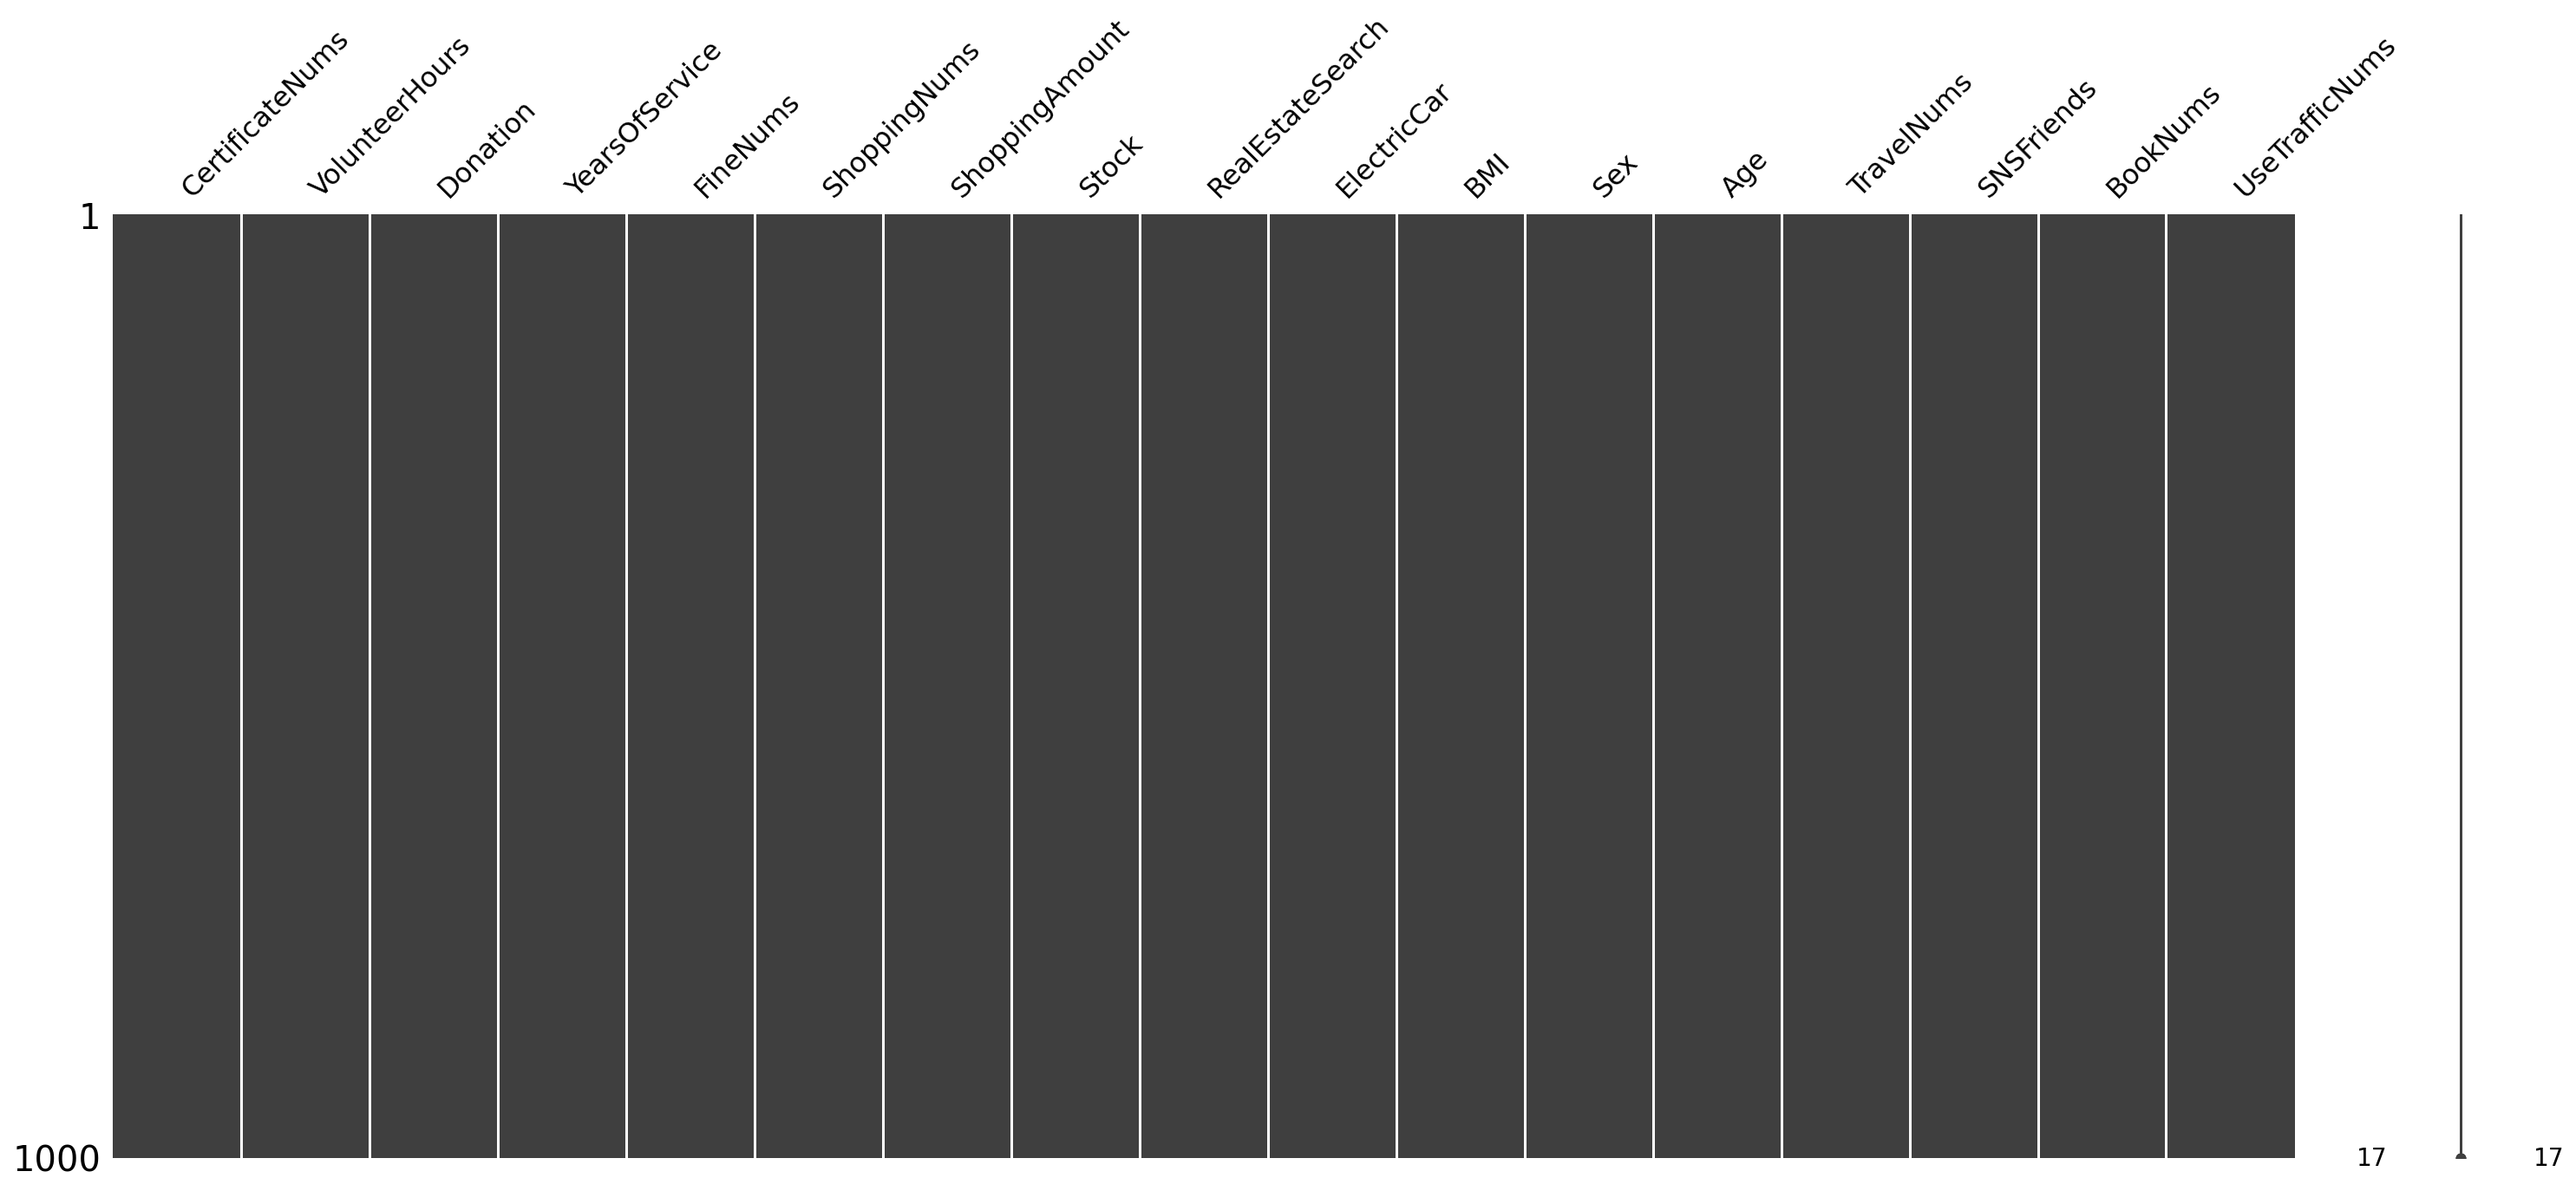

In [13]:
msno.matrix(data)

In [14]:
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

CertificateNums : 0
VolunteerHours : 0
Donation : 0
YearsOfService : 0
FineNums : 0
ShoppingNums : 0
ShoppingAmount : 0
Stock : 0
RealEstateSearch : 0
ElectricCar : 0
BMI : 0
Sex : 0
Age : 0
TravelNums : 0
SNSFriends : 0
BookNums : 0
UseTrafficNums : 0


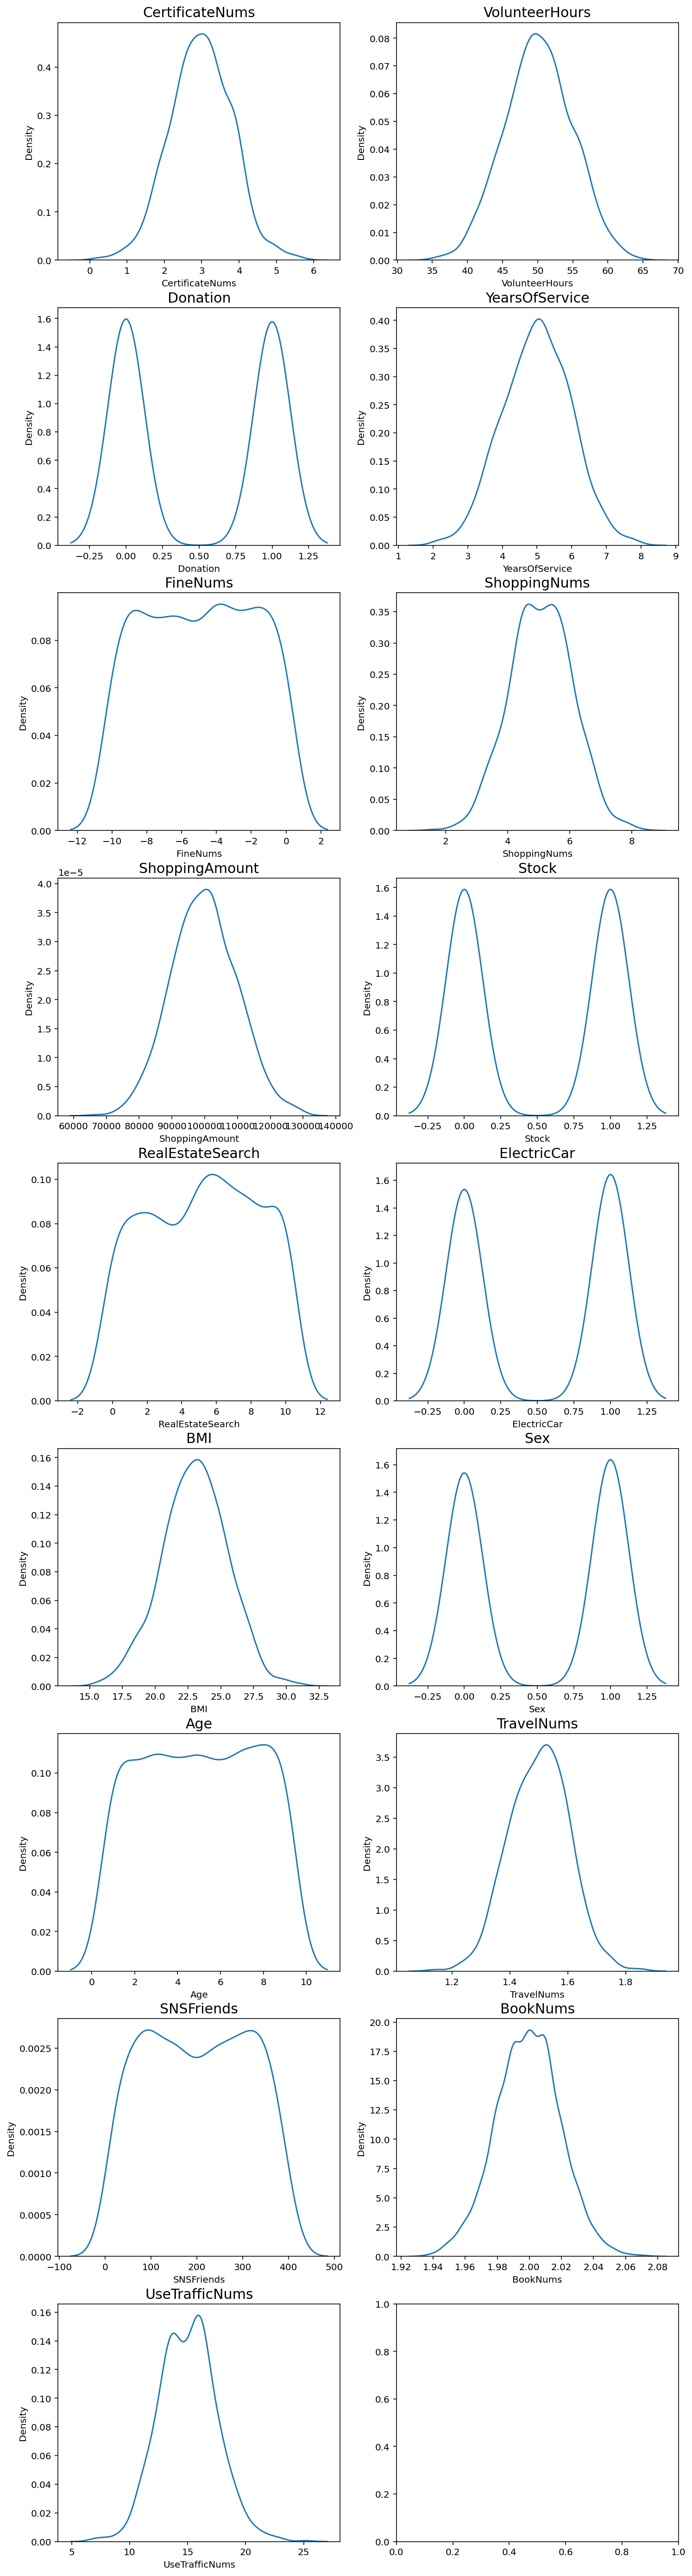

In [18]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 0
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 17 :
            break

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(800, 17)
(200, 17)


In [28]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('얍💢')

얍💢


In [31]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(X_train)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], X_train, y_train)), 
                                                  kf=kfold))
print('얍💢')

얍💢


In [32]:
get_cv_score(models)

Model GradientBoosting CV score : 0.9974
Model XGBoost CV score : 0.9975
Model LightGBM CV score : 0.9959


In [33]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

print('얍💢')

얍💢
